In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
from IPython.display import display
import os
from pprint import pprint

directory = os.path.normpath("C:\\Users\\akira\\Documents\\GitHub\\COMP30024\\Chexers\\Part B\\code\\Chexers\\logs")

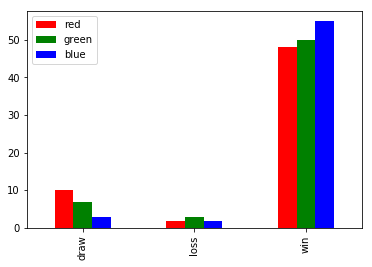

DRAWS
{'blue': ['random', 'runner', 'runner'],
 'green': ['runner',
           'runner',
           'runner',
           'runner',
           'runner',
           'runner',
           'runner'],
 'red': ['greedy',
         'greedy',
         'greedy',
         'greedy',
         'runner',
         'runner',
         'runner',
         'runner',
         'runner',
         'runner']}
LOSSES
{'blue': ['random', 'runner'],
 'green': ['runner', 'runner', 'runner'],
 'red': ['runner', 'runner']}


In [42]:
count = {'red': defaultdict(int), 'green': defaultdict(int), 'blue': defaultdict(int)}
losses = {'red': list(), 'green': list(), 'blue': list()}
draws = {'red': list(), 'green': list(), 'blue': list()}

for directory, subdirectories, files in os.walk('.'):
    if len(files) == 1:
        continue
    try:
        colour = files[0].split('_')[0]
    except:
        continue
    for file in files:
        agent = file.split('_')[1]
        f = pd.read_csv(os.path.join(directory, file),sep='\n')

        winner = f.iloc[-1].apply(lambda x: x.casefold()[len('[over ] - winner: '):])
        if 'game state occurred 4 times' in ''.join(winner.values):
            draws[colour].append(agent)
            count[colour]['draw'] += 1
        elif colour in winner.values:
            count[colour]['win'] += 1
        else:
            losses[colour].append(agent)
            count[colour]['loss'] += 1

pd.DataFrame().from_dict(count).plot.bar(color=['r','g','b'])
plt.show()

print("DRAWS")
pprint(draws)

print("LOSSES")
pprint(losses)

In [43]:
pd.DataFrame().from_dict(count).sum(axis=1)

draw     20
loss      7
win     153
dtype: int64